# Problem set 2
Due Friday 4/2/2021

Check out this Jupyter [cheat sheet](https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) for many useful things

## Wave equation and resonances
Consider the wave equation 
$$ \partial_t^2 u(t,x) = \partial_x^2 u(t,x) $$
on the interval $x \in (0,1) $ with Dirichlet boundaries ($u(t,0)=u(t,1)=0$).

The initial condition is given by 
$$ u(0,x) = u_0(x) = x (1-x), \; u_t(0,x) = v_0(x) = 0. $$

We use the good old `sinecoef` and `sinesum` functions to move between the eigenbasis and the spatial representation:

In [1]:
using QuadGK
sinecoef(f, m) = 2 * quadgk(x -> f(x) * sin(m*π*x), 0,1, atol=1e-8 * sqrt(quadgk(x->abs2(f(x)),0,1)[1]))[1]
function sinesum(b, x; t=0) # Note that I modified the arguments; there's an optional argument t for exact time evolution but this can be omitted when calling it
    f = 0.0
    for n = 1:length(b)
        f += b[n] * sin(n*π*x)*cos(n*π*t)
    end
    return f
end

sinesum (generic function with 1 method)

Below I define the initial parameters and I calculate the truncated exact solution `exactsol` given by
$$ u(x) = \sum_{n=1}^\text{nmodes} b_n \phi_n(x) \cos(\lambda_n t), $$
where 
$$ \phi_n(x) = \sin(n\pi x) = \sin(\lambda_n x) $$
are the eigenfunctions.

In [2]:
nmodes = 20 # number of modes 
tsteps = 100 # number of timesteps
Δt = 2/(tsteps+1) # time step, we choose this to give one period of oscillations
xpoints = 200 # number of points for x
x = range(0,1, length=xpoints) # create an array for the discretized x
λ = π*collect(1:nmodes) # eigenvalues
u0(x) = x*(1-x) # define the initial function
u=sinecoef.(u0,1:nmodes) # calculate sine series coefficients
exactsol = Array{Float64}(undef, nmodes, tsteps) # Allocate the solution
for i ∈ 1:tsteps
    exactsol[:,i] = u .* cos.(λ*(i-1)*Δt)
end

The cell below creates a gif animation of the time evolution of $u$

┌ Info: Saved animation to 
│   fn = /home/vili/Dropbox/work/18.303/Psets/exact.gif
└ @ Plots /home/vili/.julia/packages/Plots/KN96c/src/animation.jl:104


Plots.AnimatedGif("/home/vili/Dropbox/work/18.303/Psets/exact.gif")
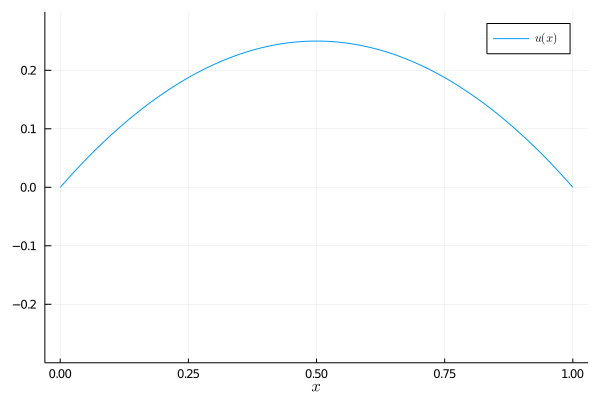

In [3]:
# using Pkg
# Pkg.add("LaTeXStrings")
using Plots # import Plots
using LaTeXStrings # Used for LaTeX formatting of strings
anim = @animate for i ∈ 1:tsteps
    plot(x,[sinesum(exactsol[:,i], x) for x in x],ylims=(-0.3,0.3),label=L"u(x)")
    xlabel!(L"x")
end
gif(anim, "exact.gif", fps = 24)

The time evolution for the coefficients $b_n$ can be written as 
$$ \partial_t^2 b_n(t) = - \lambda_n^2 b_n(t). $$

We discretize the second order time derivative as 
$$  \ddot{b}_n (k \Delta t) = \ddot{b}_n^{(k)} \approx \frac{b_n^{(k+1)} -2 b_n^{(k)} + b_n^{(k-1)}}{s^2}, $$
where $s$ is the time step.

However, discretizing the RHS of the equation is not so clear. Consider three different time discretization schemes:
1. Explicit: $ -\lambda_n^2 b_n^{(k-1)}  $
2. Center: $ -\lambda_n^2 b_n^{(k)}  $
3. Mean: $-\lambda_n^2 (b_n^{(k+1)} + b_n^{(k-1)})/2 $ (This is actually Crank-Nicolson type)

All these schemes can be written as 
$$ \begin{pmatrix} b_n^{(k+1)} \\ b_n^{(k)} \end{pmatrix} = A \begin{pmatrix} b_n^{(k)} \\ b_n^{(k-1)} \end{pmatrix}.    $$

1. Derive the matrix $A$ for all of these cases.
2. If $A$ is known, what can you say about the stability of these methods? What is the condition for divergence?

For the wave equation we can define an integral energy
$$ E[u] = \frac{1}{2} \int_0^1 \dot{u}(t,x)^2 + u'(t,x)^2 \mathrm{d} x,  $$
where the terms are the time and spatial derivatives, respectfully. 

3. Show that this energy is conserved in time for the wave equation.
4. Formulate the energy in terms of the coefficients $b_n$ and their time derivatives.

### Solution
_solution this far_

5. Create the updating algorithm for all the discretization schemes discussed above. You need $b_n$ at two different times for the initial condition, how do you choose these?
6. Create a function that returns the energy of the system. You can use any difference schemes to evaluate the time evolution of the coefficients. Use the energy to analyze the stability of the different algorithms as a function of the time step size. 

### Solution

_solution this far_

Consider now a modified wave equation
$$ \ddot{u}(t,x) + \mu \dot{u}(t,x) - \partial_x^2 u(t,x) = f(t,x) $$
with driving $$f(t,x) = \sin(\omega_0 t) (1-x). $$ 
This time assume that 
$$ u(0,x) = u_0(x) = 0, \; u_t(0,x) = v_0(x) = 0 $$
i.e. the homogeneous solution is $0$.

7. Write the time evolution for the coefficients $b_n$. 
8. Use the discretization scheme 3 and evaluate the the term multiplied by $\mu$ using central difference. Evaluate the coefficients of the function $f$ at the central point (point $k$ in the notation above). Write an updating algorithm for this scheme.
9. Use the value $\mu=0.01$. See if the energy of the system settles after some time. 
10. Use the settled energy to evaluate resonances: plot some long time limit (maybe you need to average the tail of the energy time evolution) of the energy as a function of $\omega_0 \in (0,4\pi)$. What do you notice? What happens if you change $\mu$?

### Solution